In [1]:
import pickle as pkl
import matplotlib.pyplot as plt
from matplotlib import style
import os 
os.chdir(os.path.dirname(os.getcwd()))
import pandas as pd
import pickle as pkl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
style.use('ggplot')
%matplotlib inline

In [6]:
#temperatures = pkl.load(open('data/output/temperatures_LR_0.1_GAMMA_0.99.pkl', "rb"))
temperatures = pkl.load(open('data/output/temperatures0.1_G_0.99_EPS_0.2_cycle_.pkl', "rb"))

temperatures_df = pd.DataFrame()
temperatures_df['trained'] = temperatures[-1]
temperatures_df['untrained'] = temperatures[0]
temperatures_df['hour'] = pd.to_timedelta(temperatures_df.index, unit='s')


In [7]:
temperatures_df.index = temperatures_df['hour']

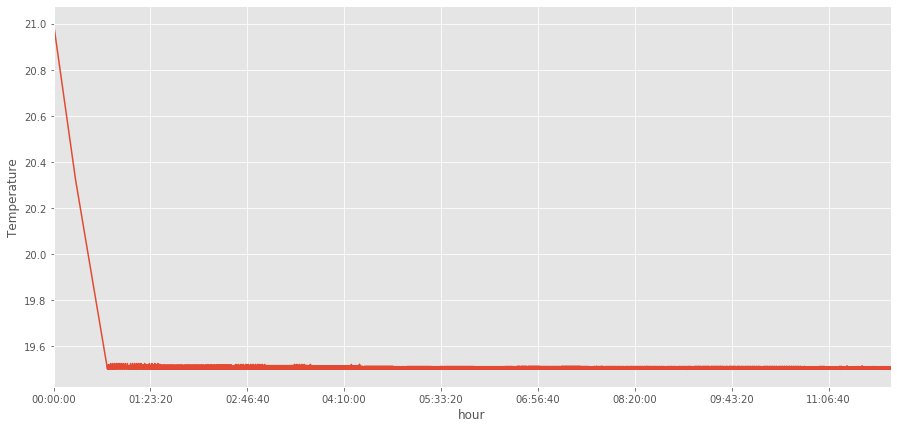

In [8]:
f, ax = plt.subplots(figsize=(15,7))

plt.ylabel('Temperature')
temperatures_df.loc[:,'trained'].plot(ax=ax)

plt.savefig('data/output/temperatures_cycle_constraint.png')

In [2]:
#rewards = pkl.load(open('data/output/rewards_LR_0.1_GAMMA_0.99.pkl', "rb"))
rewards = pkl.load(open('data/output/rewards_LR_0.1_G_0.99_EPS_0.2_cycle_.pkl', "rb"))

rewards_df = pd.DataFrame()
rewards_df['reward'] = rewards

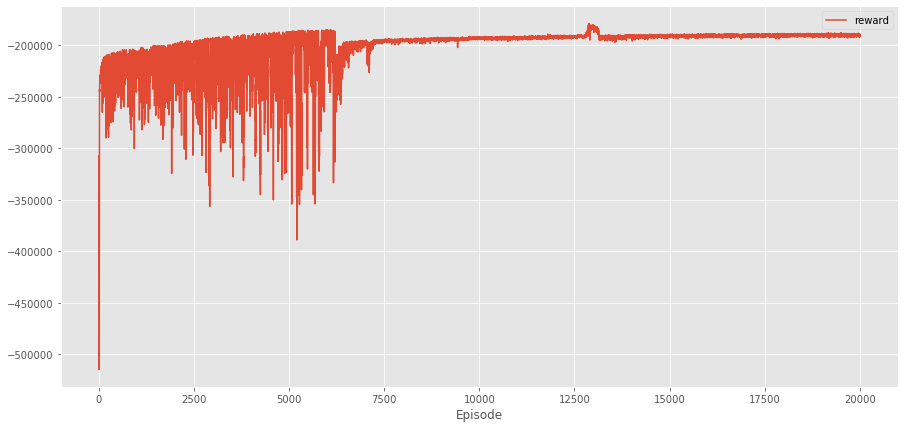

In [5]:
f, ax = plt.subplots(figsize=(15,7))
rewards_df.plot(ax=ax)
plt.xlabel('Episode')
plt.savefig('data/output/rewards_cycle_constraint.png')

In [4]:
rewards[-1]

-190420

In [49]:
temperatures = pkl.load(open('data/output/temperatures_basic.pkl', "rb"))

temperatures_df = pd.DataFrame()
temperatures_df['trained'] = temperatures
temperatures_df['hour'] = pd.to_timedelta(temperatures_df.index, unit='s')

In [50]:
temperatures_df.index = temperatures_df['hour']

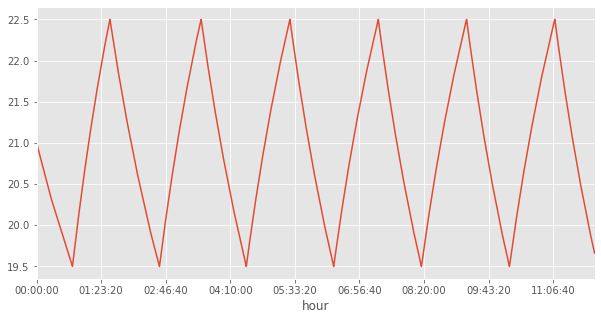

In [27]:
plt.figure(figsize=(10,5))
temperatures_df.loc[temperatures_df['hour'] < pd.to_timedelta(43200, unit='s'),'trained'].plot()

In [ ]:
f, ax = plt.subplots(figsize=(15,7))

plt.ylabel('Temperature')
temperatures_df['trained'].plot(ax=ax)

plt.savefig('data/output/temperatures_basic_controller.png')

In [53]:
rewards = pkl.load(open('data/output/rewards_basic.pkl', "rb"))

rewards_df = pd.DataFrame()
rewards_df['reward'] = rewards

In [54]:
sum(rewards)

-199710

# The learned policy 

In [56]:
q_table = pkl.load(open('q_table_no_cycle.pkl', "rb"))

In [61]:
import numpy as np
policy = {k: np.argmax(v) for k, v in q_table.items()} 

In [68]:
for t in np.arange(19.5, 23, 1/10):
    print('Temperature {} --> action {}'.format(np.round(t, decimals = 1),policy[np.round(t, decimals = 1)]))

Temperature 19.5 --> action 1
Temperature 19.6 --> action 0
Temperature 19.7 --> action 0
Temperature 19.8 --> action 1
Temperature 19.9 --> action 0
Temperature 20.0 --> action 0
Temperature 20.1 --> action 0
Temperature 20.2 --> action 0
Temperature 20.3 --> action 0
Temperature 20.4 --> action 0
Temperature 20.5 --> action 0
Temperature 20.6 --> action 0
Temperature 20.7 --> action 0
Temperature 20.8 --> action 0
Temperature 20.9 --> action 0
Temperature 21.0 --> action 0
Temperature 21.1 --> action 1
Temperature 21.2 --> action 0
Temperature 21.3 --> action 1
Temperature 21.4 --> action 1
Temperature 21.5 --> action 0
Temperature 21.6 --> action 1
Temperature 21.7 --> action 1
Temperature 21.8 --> action 0
Temperature 21.9 --> action 0
Temperature 22.0 --> action 1
Temperature 22.1 --> action 0
Temperature 22.2 --> action 1
Temperature 22.3 --> action 0
Temperature 22.4 --> action 0
Temperature 22.5 --> action 1
Temperature 22.6 --> action 0
Temperature 22.7 --> action 0
Temperatur

# DQN Agent

## No dynamic outside parameters

In [23]:
rewards = pkl.load(open('data/output/basic/3163795_dynamic_False_rewards_dqn.pkl', "rb"))

In [24]:
rewards[-1]

{'NUM_EPISODES': 1000,
 'EPSILON': 1,
 'EPS_DECAY': 0.9998,
 'LEARNING_RATE': 0.00025,
 'GAMMA': 0.99,
 'TARGET_UPDATE': 10,
 'BATCH_SIZE': 32,
 'TIME_STEP_SIZE': 600,
 'NUM_HOURS': 744,
 'E_PRICE': 1,
 'COMFORT_PENALTY': 10}

In [25]:
rewards_df = pd.DataFrame()
rewards_df['reward'] = rewards[:-1]

In [29]:
r = rewards_df.fillna(rewards_df.mean())

In [30]:
moving_avg = r.rolling(window=10).mean()

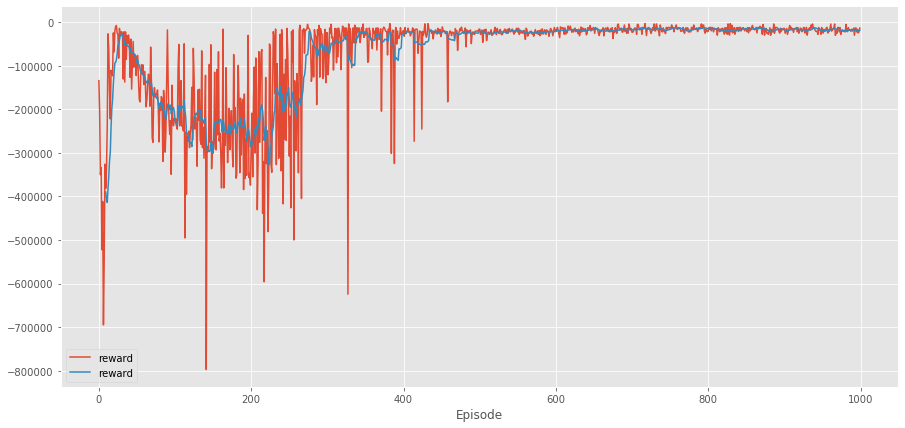

In [31]:
f, ax = plt.subplots(figsize=(15,7))
r.plot(ax=ax)
moving_avg.plot(ax=ax)
plt.xlabel('Episode')
plt.savefig('data/output/rewards_not_dynamic_dqn.png')

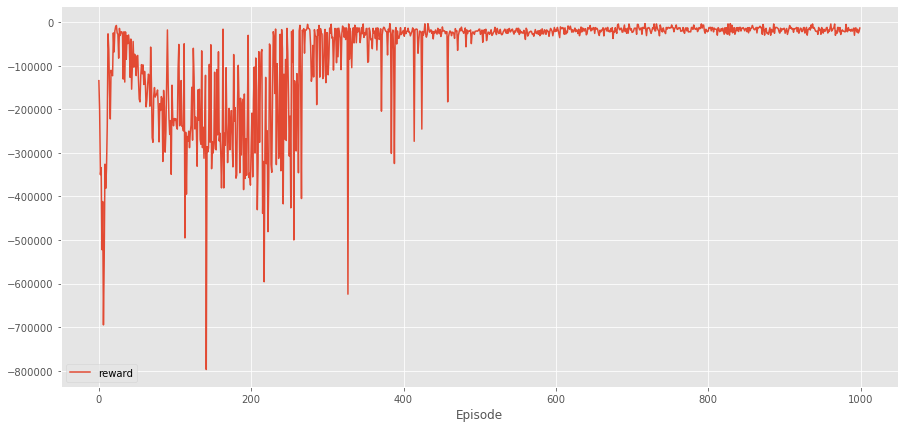

In [26]:
f, ax = plt.subplots(figsize=(15,7))
rewards_df.plot(ax=ax)
plt.xlabel('Episode')
plt.savefig('data/output/rewards_no_dynamic_dqn.png')

In [3]:
temperatures = pkl.load(open('data/output/DQN Not dynamic/2116796_dynamic_False_temperatures_dqn.pkl', "rb"))

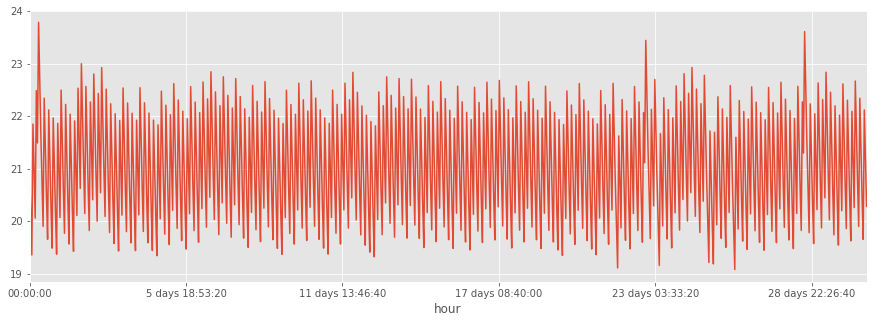

In [28]:
temperatures_df = pd.DataFrame()
temperatures_df['trained'] = temperatures[-2]
temperatures_df['hour'] = pd.to_timedelta(temperatures_df.index, unit='h')

temperatures_df.index = temperatures_df['hour']

plt.figure(figsize=(15,5))
temperatures_df.iloc[:,:].loc[:,'trained'].plot()
plt.savefig('data/output/DQN-Dyn-Price/eval.png',bbox_inches='tight')

## Dynamic outside parameters

In [3]:
rewards = pkl.load(open('data/output/DQN-Dyn-Weather/2710092_dynamic_True_rewards_dqn.pkl', "rb"))

In [4]:
rewards[-1]

{'NUM_EPISODES': 1000,
 'EPSILON': 1,
 'EPS_DECAY': 0.9998,
 'LEARNING_RATE': 0.00025,
 'GAMMA': 0.99,
 'TARGET_UPDATE': 10,
 'BATCH_SIZE': 32,
 'TIME_STEP_SIZE': 600,
 'NUM_HOURS': 744,
 'E_PRICE': 1,
 'COMFORT_PENALTY': 2}

In [4]:
rewards_df = pd.DataFrame()
rewards_df['reward'] = rewards[:-1]

In [6]:
r = rewards_df.fillna(rewards_df.mean())

In [7]:
moving_avg = r.rolling(window=10).mean()

Text(0.5, 0, 'Episode')

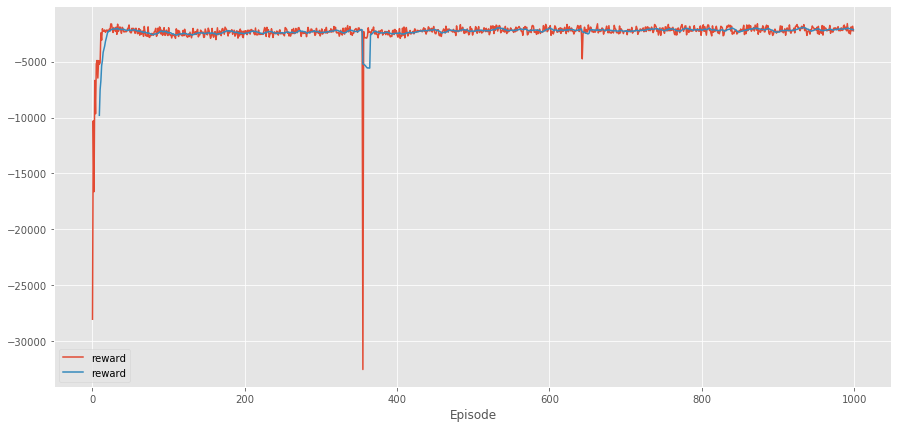

In [8]:
f, ax = plt.subplots(figsize=(15,7))
r.plot(ax=ax)
moving_avg.plot(ax=ax)
plt.xlabel('Episode')
#plt.savefig('data/output/rewards_dynamic_dqn.png')

In [10]:
temperatures = pkl.load(open('data/output/DQN-Dyn-Weather/2622882_dynamic_True_temperatures_dqn.pkl', "rb"))

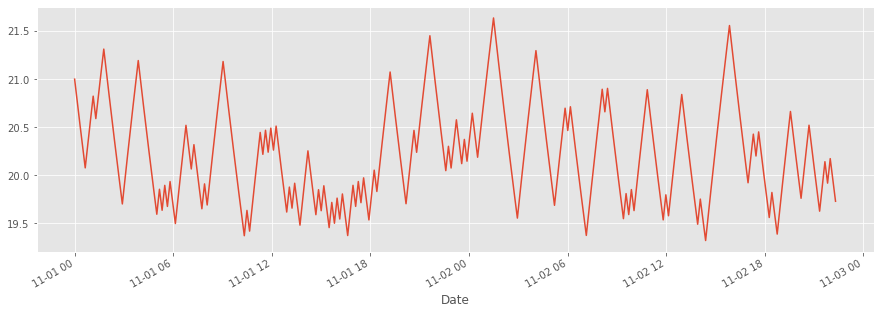

In [33]:
temperatures_df = pd.DataFrame()
temperatures_df['trained'] = temperatures[-3]
temperatures_df['Date'] = pd.date_range(start='2014-11-01',end='2014-12-01', periods=len(temperatures_df['trained']))

temperatures_df.index = temperatures_df['Date']

plt.figure(figsize=(15,5))
temperatures_df.iloc[:48*6,:].loc[:,'trained'].plot()

In [11]:
temperatures[-1]

{'NUM_EPISODES': 2000,
 'EPSILON': 1,
 'EPS_DECAY': 0.9998,
 'LEARNING_RATE': 0.0001,
 'GAMMA': 0.99,
 'TARGET_UPDATE': 10,
 'BATCH_SIZE': 32,
 'TIME_STEP_SIZE': 600,
 'NUM_HOURS': 744,
 'E_PRICE': 1,
 'COMFORT_PENALTY': 2}

### Evaluation on January

In [2]:
eval_data = pkl.load(open('data/output/DQN-Dyn-Weather/Dyn_Weather_eval.pkl', 'rb'))
eval_data['Date'] = pd.date_range(start='2014-01-01',end='2014-02-01', periods=len(eval_data))
eval_data.index = eval_data['Date']

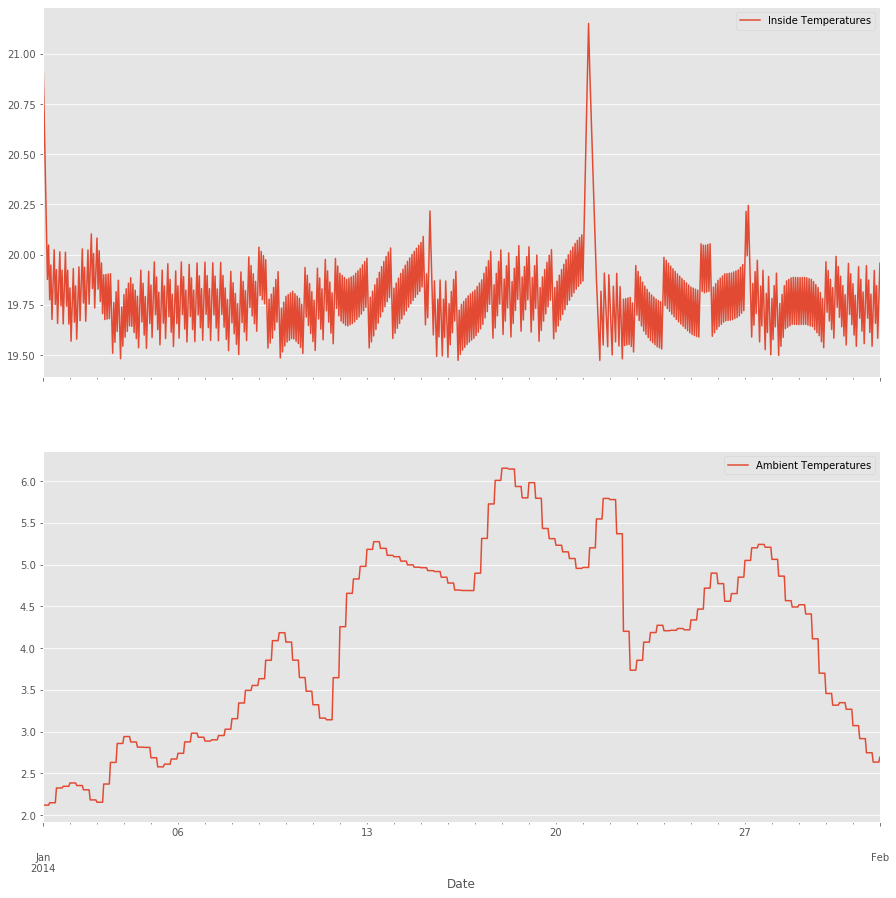

In [4]:
fig, axs = plt.subplots(2,figsize=(15,15), sharex=True)

eval_data['Inside Temperatures'].plot(ax=axs[0], legend=True)
eval_data['Ambient Temperatures'].plot(ax=axs[1], legend=True)
plt.savefig('data/output/DQN-Dyn-Weather/EvalSingleWeather.png',bbox_inches='tight')

### With Dynamic price

In [2]:
rewards = pkl.load(open('data/output/DQN-Dyn-Price/2906093_dynamic_True_rewards_dqn.pkl', "rb"))

In [3]:
rewards[-1]

{'NUM_EPISODES': 1000,
 'EPSILON': 1,
 'EPS_DECAY': 0.9998,
 'LEARNING_RATE': 0.00025,
 'GAMMA': 0.99,
 'TARGET_UPDATE': 10,
 'BATCH_SIZE': 32,
 'TIME_STEP_SIZE': 600,
 'NUM_HOURS': 744,
 'E_PRICE': 1,
 'COMFORT_PENALTY': 10}

In [4]:
rewards_df = pd.DataFrame()
rewards_df['reward'] = rewards[:-1]

In [5]:
r = rewards_df.fillna(rewards_df.mean())

In [6]:
moving_avg = r.rolling(window=10).mean()

In [7]:
moving_avg = moving_avg.rename(columns={'reward':'moving average'})

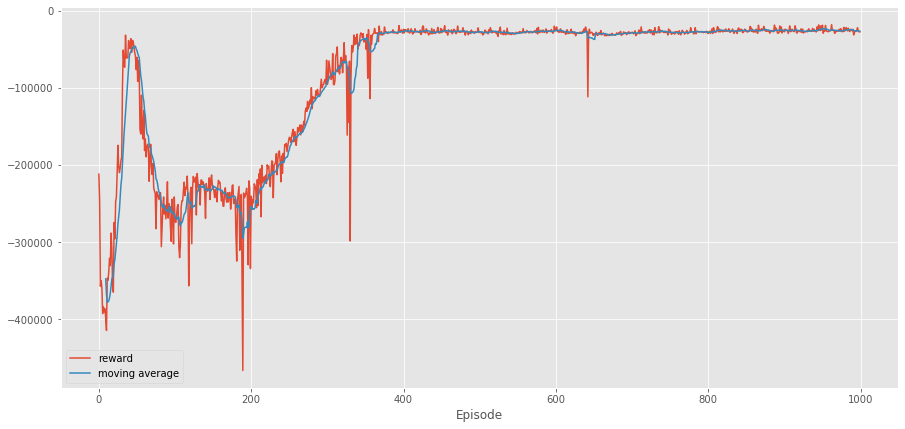

In [9]:
f, ax = plt.subplots(figsize=(15,7))
r.plot(ax=ax)
moving_avg.plot(ax=ax)
plt.xlabel('Episode')
plt.savefig('data/output/rewards_dynamic_dqn.png')

In [11]:
temperatures = pkl.load(open('data/output/DQN-Dyn-Price/2906093_dynamic_True_temperatures_dqn.pkl', "rb"))

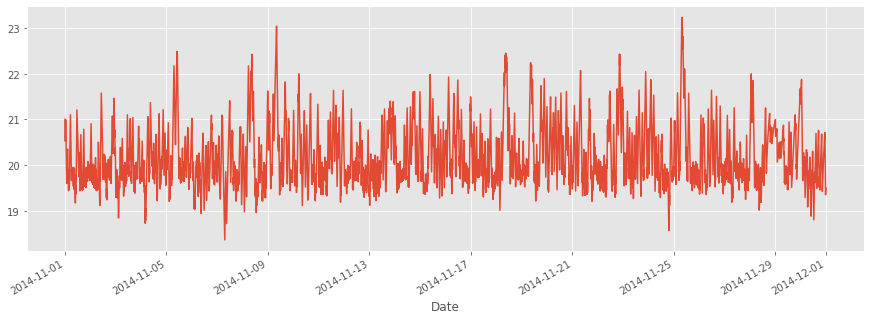

In [12]:
temperatures_df = pd.DataFrame()
temperatures_df['trained'] = temperatures[-2]
temperatures_df['Date'] = pd.date_range(start='2014-11-01',end='2014-12-01', periods=len(temperatures_df['trained']))

temperatures_df.index = temperatures_df['Date']

plt.figure(figsize=(15,5))
temperatures_df.iloc[:,:].loc[:,'trained'].plot()
#plt.savefig('data/output/temperatures_dynamic_dqn.png')

### Evaluation on January

In [12]:
eval_data = pkl.load(open('data/output/DQN-Dyn-Price/Dyn_Price_HighComfort_eval.pkl', 'rb'))

In [13]:
eval_data['Date'] = pd.date_range(start='2014-01-01',end='2014-02-01', periods=len(eval_data))
eval_data.index = eval_data['Date']

In [14]:
eval_data

,Inside Temperatures,Ambient Temperatures,Prices,Actions,Rewards,Date
Date,,,,,,
2014-01-01 00:00:00,21.000000,2.118,15.15,0.0,0.000000,2014-01-01 00:00:00
2014-01-01 00:10:00,20.712611,2.118,15.15,0.0,-0.000000,2014-01-01 00:10:00
2014-01-01 00:20:00,20.429595,2.118,15.15,0.0,-0.000000,2014-01-01 00:20:00
2014-01-01 00:30:00,20.150888,2.118,15.15,0.0,-0.000000,2014-01-01 00:30:00
2014-01-01 00:40:00,19.876422,2.118,15.15,0.0,-0.000000,2014-01-01 00:40:00
...,...,...,...,...,...,...
2014-01-31 23:20:00,19.630548,-2.473,31.67,1.0,-10.556667,2014-01-31 23:20:00
2014-01-31 23:30:00,19.690605,-2.473,31.67,1.0,-10.556667,2014-01-31 23:30:00
2014-01-31 23:40:00,19.749748,-2.473,31.67,1.0,-10.556667,2014-01-31 23:40:00


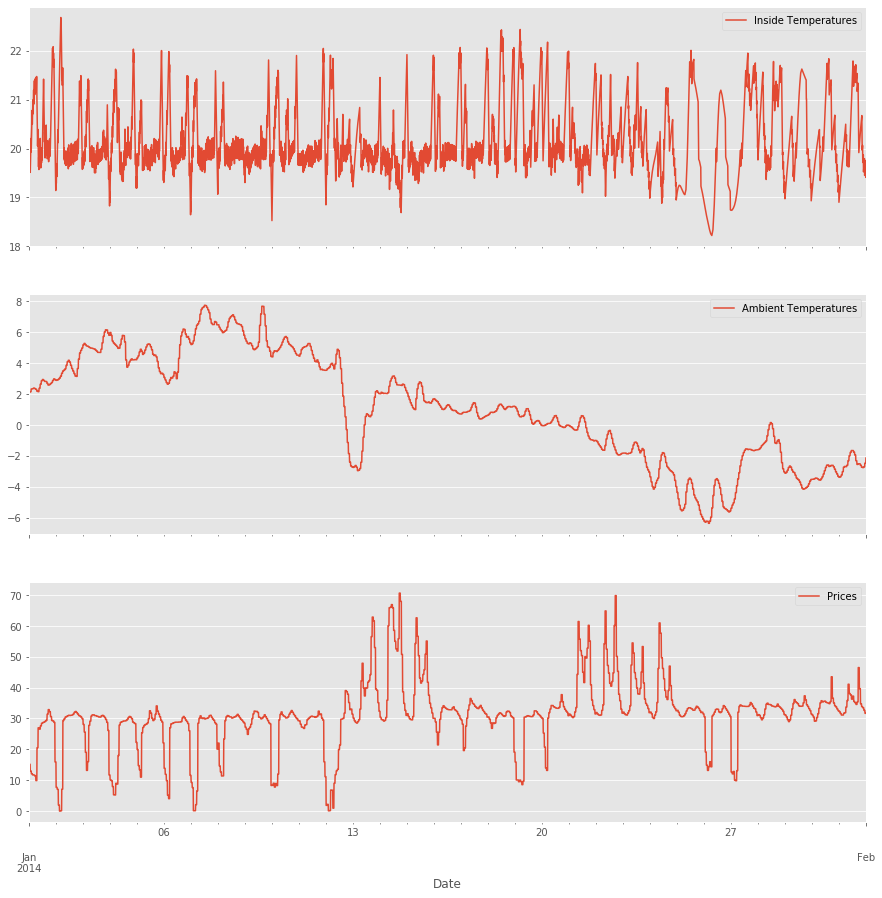

In [15]:
fig, axs = plt.subplots(3,figsize=(15,15), sharex=True)

zoomed_in = eval_data.iloc[:1008,:] # Taking first week for nicer visualization
eval_data['Inside Temperatures'].plot(ax=axs[0], legend=True)
eval_data['Ambient Temperatures'].plot(ax=axs[1], legend=True)
eval_data['Prices'].plot(ax=axs[2], legend=True)
plt.savefig('data/output/DQN-Dyn-Price/eval.png',bbox_inches='tight')

In [17]:
total_power = sum(eval_data['Actions']*2000*10*60/3600)
total_power

982000.0000000411

# DDPG

In [14]:
rewards = pkl.load(open('data/output/DDPG/5751464_dynamic_True_rewards_dqn.pkl', "rb"))

In [15]:
rewards[-1]

{'NUM_EPISODES': 4000,
 'EPSILON': 1,
 'EPS_DECAY': 0.9998,
 'LEARNING_RATE_ACTOR': 0.0001,
 'LEARNING_RATE_CRITIC': 0.001,
 'GAMMA': 0.99,
 'TARGET_UPDATE': 10,
 'BATCH_SIZE': 8,
 'TIME_STEP_SIZE': 600,
 'NUM_HOURS': 24,
 'COMFORT_PENALTY': 10,
 'MEMORY_SIZE': 144000}

In [16]:
rewards_df = pd.DataFrame()
rewards_df['reward'] = rewards[:-1]

In [17]:
r = rewards_df.fillna(rewards_df.mean())

In [18]:
moving_avg = r.rolling(window=10).mean()

In [19]:
moving_avg = moving_avg.rename(columns={'reward':'moving average'})

Text(0.5, 0, 'Episode')

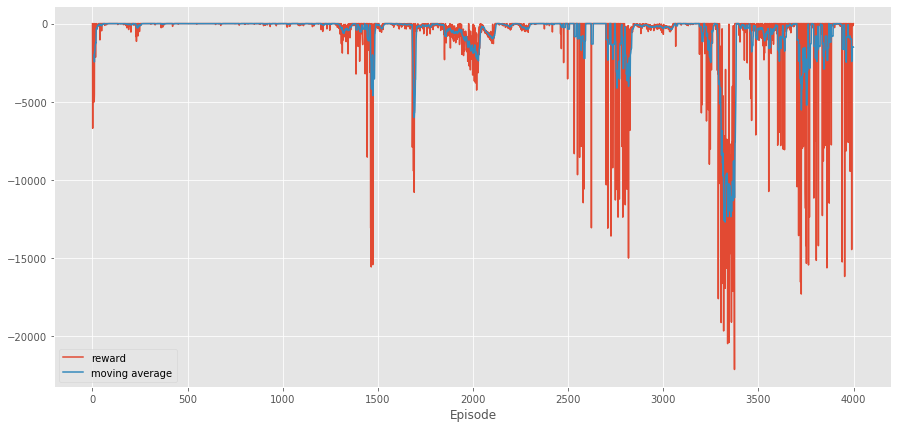

In [20]:
f, ax = plt.subplots(figsize=(15,7))
r.plot(ax=ax)
moving_avg.plot(ax=ax)
plt.xlabel('Episode')
#plt.savefig('data/output/rewards_dynamic_dqn.png')

In [32]:
eval_data = pkl.load(open('data/output/DDPG/DDPG_eval.pkl', 'rb'))

In [34]:
eval_data = pkl.load(open('data/output/DDPG/Model_for_multi_building/DDPG_19_degrees_eval.pkl', 'rb'))

In [35]:
eval_data['Date'] = pd.date_range(start='2014-01-01',end='2014-02-01', periods=len(eval_data))
eval_data.index = eval_data['Date']

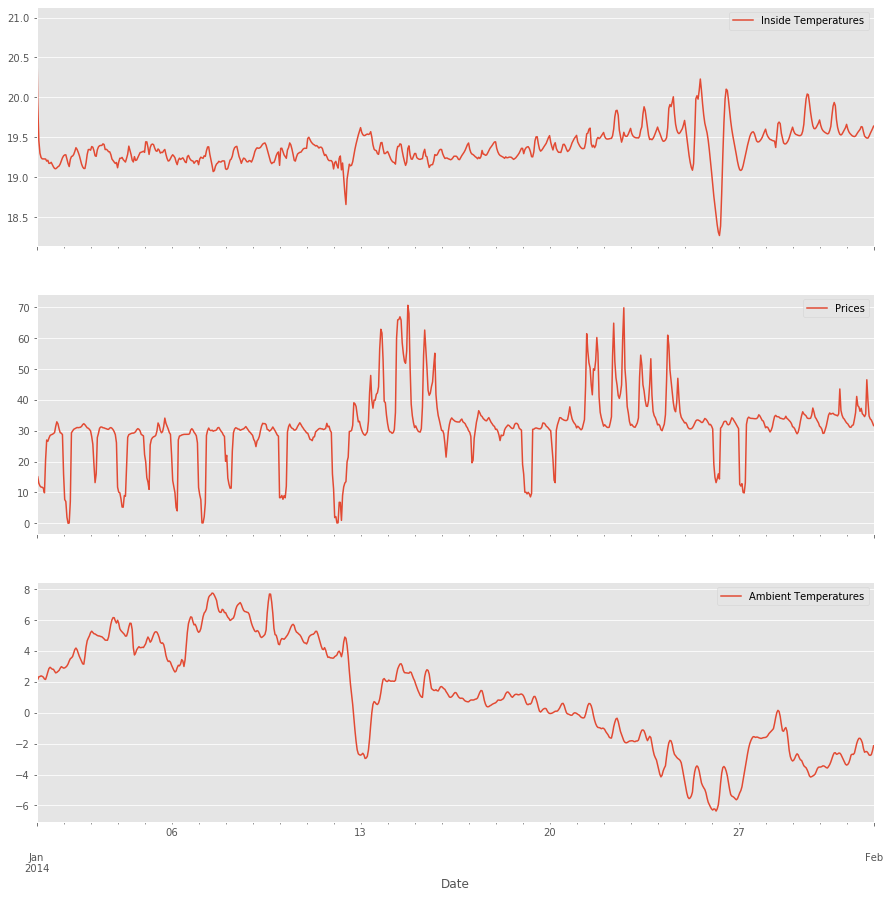

In [37]:
fig, axs = plt.subplots(3,figsize=(15,15), sharex=True)

eval_data['Inside Temperatures'].plot(ax=axs[0], legend=True)
eval_data['Ambient Temperatures'].plot(ax=axs[2], legend=True)
eval_data['Prices'].plot(ax=axs[1], legend=True)
#plt.savefig('data/output/DDPG/DDPG_1h_eval.png',bbox_inches='tight')

In [5]:
costs_ddpg = sum(2000*eval_data['Prices']/1e6*eval_data['Actions']*60*60/3600)

In [6]:
costs_ddpg

29.6097842508763

In [7]:
total_power = sum(2000*eval_data['Actions']*60*60/3600)
total_power

937719.1276550293

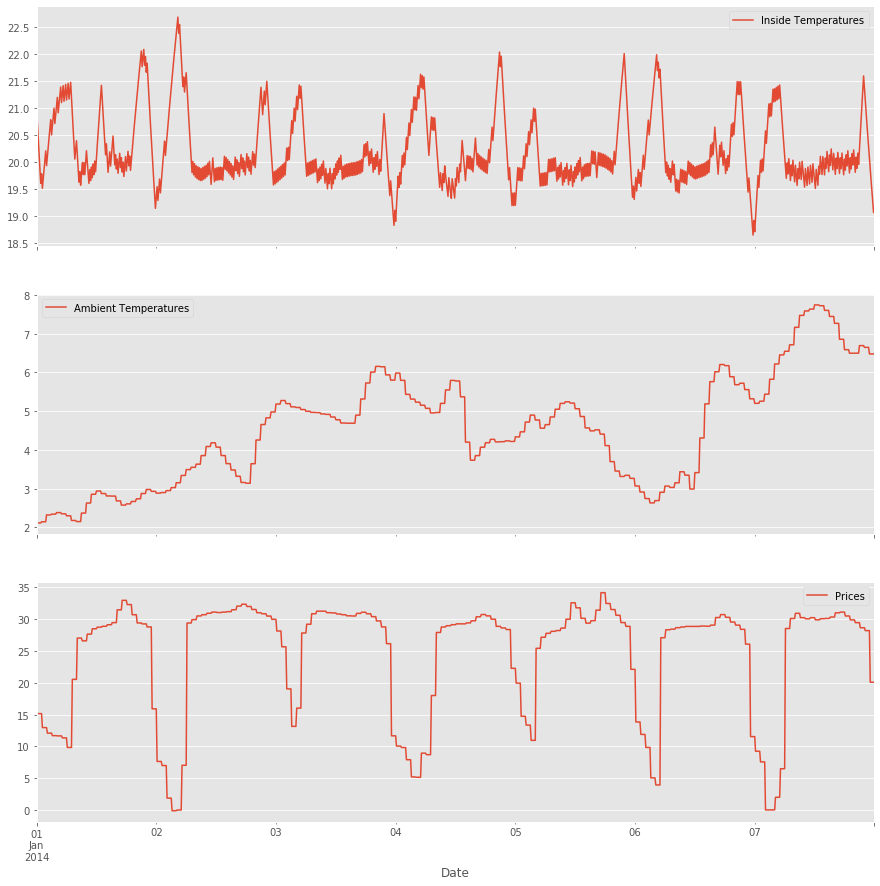

In [16]:
fig, axs = plt.subplots(3,figsize=(15,15), sharex=True)

zoomed_in = eval_data.iloc[:1008,:] # Taking first week for nicer visualization
zoomed_in['Inside Temperatures'].plot(ax=axs[0], legend=True)
zoomed_in['Ambient Temperatures'].plot(ax=axs[1], legend=True)
zoomed_in['Prices'].plot(ax=axs[2], legend=True)
plt.savefig('data/output/DQN-Dyn-Price/eval_zoomed.png',bbox_inches='tight')

In [5]:
eval_data['Prices_kWh']=eval_data['Prices']/1000

In [22]:
sum(eval_data['Actions'])

2882.0

In [17]:
costs_dqn = sum(2000*eval_data['Prices']/1e6*eval_data['Actions']*10*60/3600)

In [18]:
costs_dqn

30.723966666666747

## Evaluation of the policy

In [2]:
policy_data = pkl.load(open('data/output/DDPG/Model_for_multi_building/DDPG_19_C_policy_eval.pkl', 'rb'))

In [3]:
policy_data

,Inside Temperatures,Ambient Temperatures,Prices,Actions
0,19.0,-5.0,0,0.999992
1,19.0,-5.0,1,0.999985
2,19.0,-5.0,2,0.999970
3,19.0,-5.0,3,0.999945
4,19.0,-5.0,4,0.999902
...,...,...,...,...
179995,21.9,4.9,55,0.017163
179996,21.9,4.9,56,0.015753
179997,21.9,4.9,57,0.014671
179998,21.9,4.9,58,0.013736


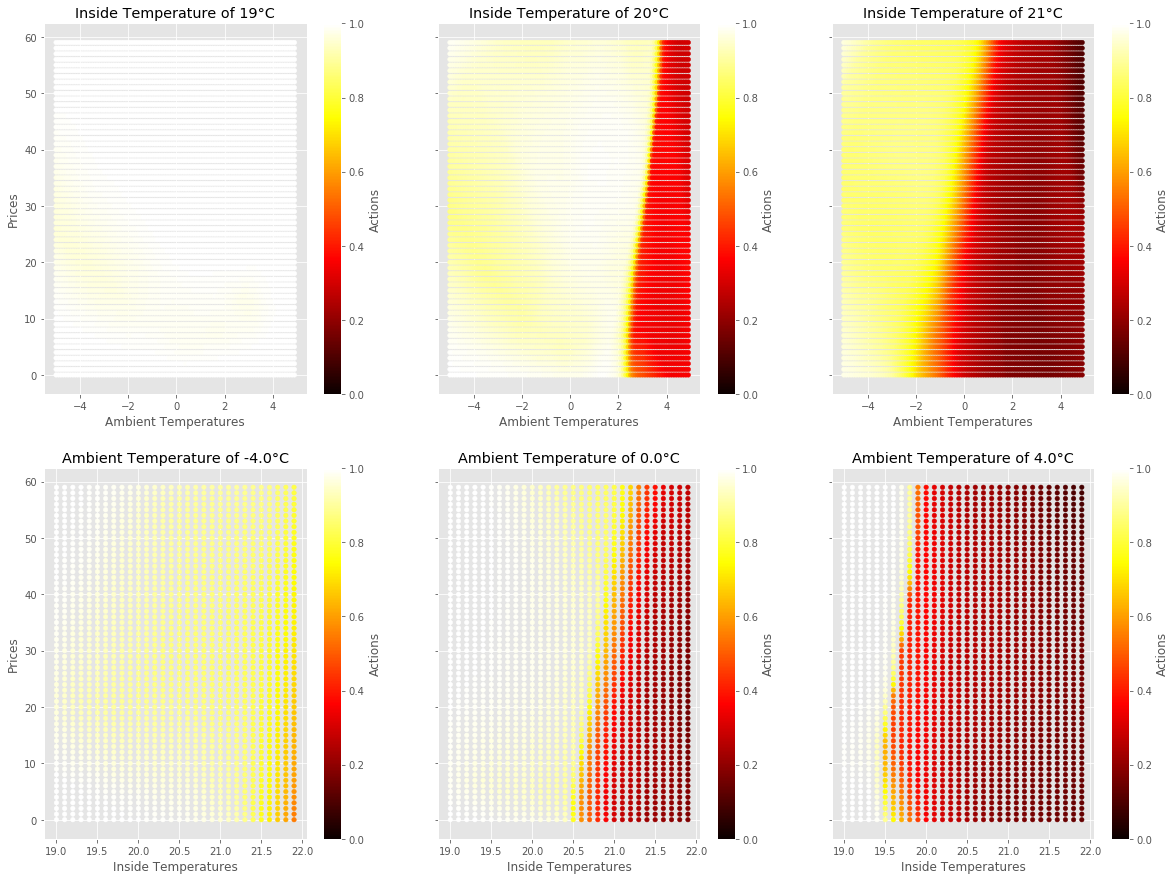

In [6]:
fig, axs = plt.subplots(2,3,figsize=(20,15), sharey=True)

selected_temperatures = [19, 20, 21]

for i in range(3):
    selected = policy_data[(np.round(policy_data['Inside Temperatures'],1) == selected_temperatures[i])]
    selected.plot.scatter(x='Ambient Temperatures', y = 'Prices',c='Actions', colormap='hot', colorbar='False', ax = axs[0][i], vmin=0, vmax=1)
    axs[0][i].set_title('Inside Temperature of {}°C'.format(selected_temperatures[i]))
    
selected_temperatures = [-4., 0., 4.]

for i in range(3):
    selected = policy_data[(np.round(policy_data['Ambient Temperatures'],1) == selected_temperatures[i])]
    selected.plot.scatter(x='Inside Temperatures', y = 'Prices',c='Actions', colormap='hot', colorbar='False', ax = axs[1][i], vmin=0, vmax=1)
    axs[1][i].set_title('Ambient Temperature of {}°C'.format(selected_temperatures[i]))
    
#fig.colorbar(ims[0], ax=axs)
#plt.savefig('data/output/DDPG/DDPG_policy_eval.png',bbox_inches='tight')

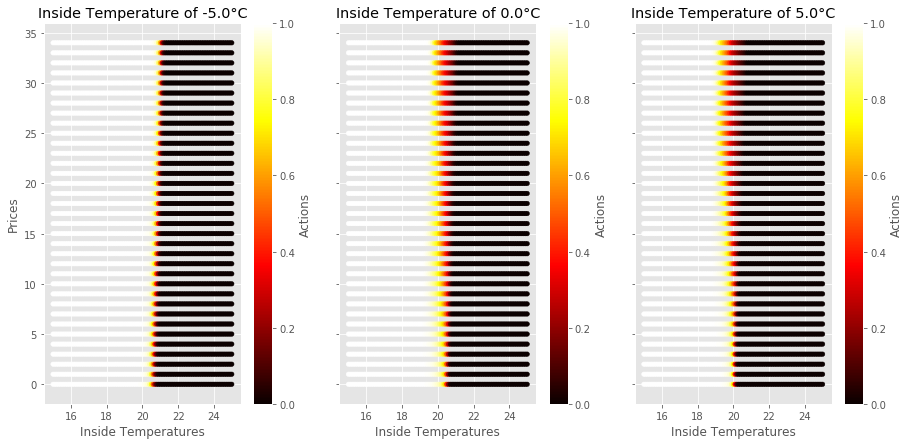

In [26]:
import numpy as np
fig, axs = plt.subplots(1,3,figsize=(15,7), sharey=True)

selected_temperatures = [-5., 0., 5.]
ims = []

for i in range(3):
    selected = policy_data[(policy_data['Inside Temperatures'] <= 25)& (policy_data['Inside Temperatures'] >= 15)& (np.round(policy_data['Ambient Temperatures'],1) == selected_temperatures[i])]
    selected.plot.scatter(x='Inside Temperatures', y = 'Prices',c='Actions', colormap='hot', colorbar='False', ax = axs[i], vmin=0, vmax=1)
    axs[i].set_title('Ambient Temperature of {}°C'.format(selected_temperatures[i]))
    
#fig.colorbar(ims[0], ax=axs)
plt.savefig('data/output/DDPG/DDPG_ambient_policy_eval.png',bbox_inches='tight')

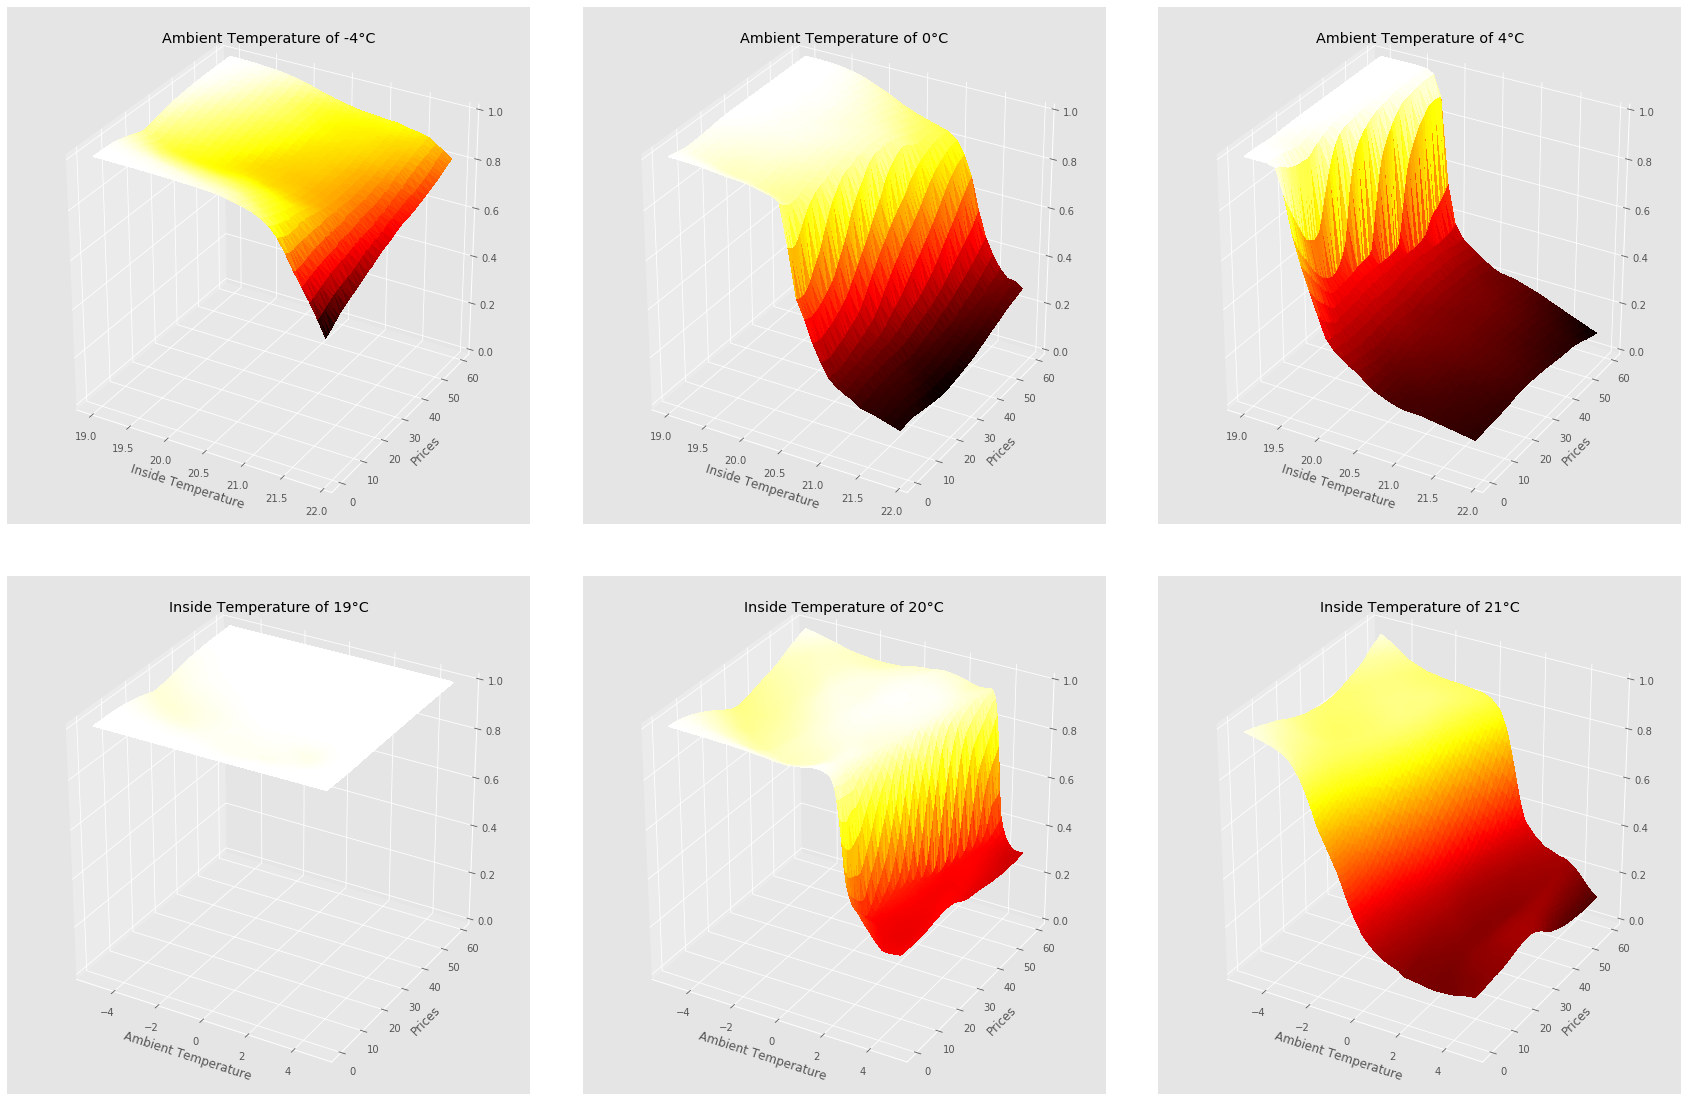

In [40]:
import numpy as np
fig = plt.figure(figsize=(30,20))

selected_temperatures = [-4, 0, 4]

for i in range(3):
    selected = policy_data[(np.round(policy_data['Ambient Temperatures'],1) == selected_temperatures[i]) ]
    X = selected['Inside Temperatures']
    Y = selected['Prices']
    Z = selected['Actions']
    ax = fig.add_subplot(2, 3, i+1, projection='3d')

    ax.plot_trisurf(X, Y, Z, cmap=cm.hot,
                       linewidth=0, antialiased=False)
    #selected.plot.scatter(x='Sun Power', y = 'Prices',c='Actions', colormap='hot', colorbar='False', ax = axs[0][i], vmin=-1, vmax=1)
    ax.set_title('Ambient Temperature of {}°C'.format(selected_temperatures[i]))
    ax.set_xlabel('Inside Temperature')
    ax.set_ylabel('Prices')
    #ax.set_zlabel('Actions')
    ax.set_zlim(0, 1)
    #ax.zaxis._axinfo['label']['space_factor'] = 50
    
selected_temperatures = [19, 20, 21]

for i in range(3):
    selected = policy_data.loc[(np.round(policy_data['Inside Temperatures'],1) == selected_temperatures[i])] #  and 
    #selected.plot.scatter(x='Time', y = 'Prices',c='Actions', colormap='hot', colorbar='False', ax = axs[1][i], vmin=-1, vmax=1)
    X = selected['Ambient Temperatures']
    Y = selected['Prices']
    Z = selected['Actions']
    ax = fig.add_subplot(2, 3, i+4, projection='3d')

    ax.plot_trisurf(X, Y, Z, cmap=cm.hot,
                       linewidth=0, antialiased=False, vmin=0, vmax=1)
    #selected.plot.scatter(x='Sun Power', y = 'Prices',c='Actions', colormap='hot', colorbar='False', ax = axs[0][i], vmin=-1, vmax=1)
    ax.set_title('Inside Temperature of {}°C'.format(selected_temperatures[i]))
    #ax.zaxis._axinfo['label']['space_factor'] = 2.8
    ax.set_xlabel('Ambient Temperature')
    ax.set_ylabel('Prices')
    #ax.set_zlabel('Actions')
    ax.set_zlim(0, 1)
    ax.xaxis._axinfo['label']['space_factor'] = 2.8
    
plt.subplots_adjust(wspace=0.1, hspace = 0.1)
    
#plt.savefig('data/output/DDPG/DDPG_policy_eval_3D.png',bbox_inches='tight')

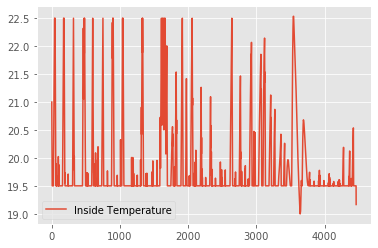

In [14]:
LP_data = pkl.load(open('data/output/DDPG/LP_output.pkl', 'rb'))
LP_data.plot()

### Basic Controller on January

In [22]:
costs = pkl.load(open('data/output/DQN-Dyn-Price/dyn_prices_costs_basic.pkl', 'rb'))

In [24]:
sum(costs)

32.43607666666674

In [29]:
costs_df = pd.DataFrame(costs, columns = ['cost'])

In [30]:
costs_df

,cost
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
4459,0.010557
4460,0.010557
4461,0.010557
4462,0.010557


In [32]:
costs_df['action'] = (costs_df['cost']!=0)*1
total_power = sum(2000*costs_df['action']*10*60/3600)
total_power

1028333.3333333798

# Comparing performances

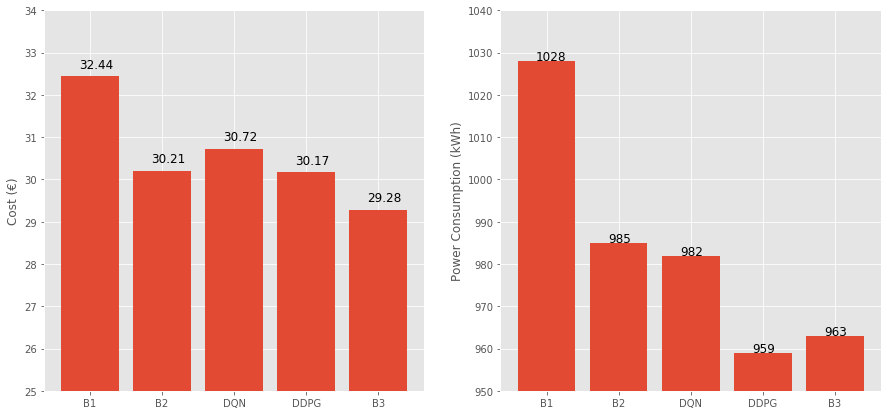

In [22]:
import numpy as np
basic_controller_cost = 32.43607666666674 # Based on previous analysis
binary_lp_cost = 30.205400000000264 # The binary linear programming problem
dqn_cost = 30.723966666666747 # Costs obtained with DQN
ddpg_cost = 30.172001754492214 # The costs obtained with DDPG
lp_cost = 29.278686824876633 # The continuous LP problem
cost_labels_values = np.round(np.array([basic_controller_cost,binary_lp_cost, dqn_cost, ddpg_cost, lp_cost]), decimals=2)
costs = cost_labels_values - 25
labels = ['B1', 'B2', 'DQN', 'DDPG', 'B3']

basic_controller_power = 1028333.3333333798/1000
binary_lp_power = 492.6666666666877*2000/1000
dqn_power = 982000.0000000411/1000
ddpg_power = 959615.9941304976/1000
lp_power = 963676.8853379944/1000

power_labels_values = np.array([int(basic_controller_power),int(binary_lp_power), int(dqn_power), int(ddpg_power), int(lp_power)])
powers = power_labels_values - 950

scaled_costs = np.round(cost_labels_values/power_labels_values, decimals=3)

N=5
ind = np.arange(N)
f, axs = plt.subplots(1,2,figsize=(15,7), sharey=False)
axs[0].bar(ind, costs, bottom=25)
axs[0].set_ylabel('Cost (€)')
axs[0].set_yticks(np.arange(25, 35, 1))
for i, v in enumerate(cost_labels_values):
    axs[0].text(i-0.15, 
              v+0.2, 
              v, 
              fontsize=12)
axs[0].set_xticks(ind)
axs[0].set_xticklabels(labels)

axs[1].bar(ind, powers, bottom=950)
axs[1].set_ylabel('Power Consumption (kWh)')
axs[1].set_yticks(np.arange(950, 1050, 10))
for i, v in enumerate(power_labels_values):
    axs[1].text(i-0.15, 
              v+0.2, 
              v, 
              fontsize=12)
axs[1].set_xticks(ind)
axs[1].set_xticklabels(labels)

#axs[2].bar(ind, scaled_costs)
#axs[2].set_ylabel('Cost per used kWh (€/kWh)')
#axs[2].set_yticks(np.arange(0, 0.1, 0.01))
#for i, v in enumerate(scaled_costs):
#    axs[2].text(i-0.15, 
#              v+0.01, 
#              v, 
#              fontsize=12)
#axs[2].set_xticks(ind)
#axs[2].set_xticklabels(labels)


plt.savefig('data/output/comparing_solutions_dyn_prices.png',bbox_inches='tight')

In [7]:
np.arange(25, 35, 1)

array([25, 26, 27, 28, 29, 30, 31, 32, 33, 34])